<a href="https://colab.research.google.com/github/panaku88/MCS-7103-Machine-Learning/blob/main/customer_support_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on last week's lecture, your assignment is to perform Exploratory Data Analysis Process (DAP) on your dataset and write a report that is at least 3 pages long. You can write as many pages as you need. The report needs to be clear and follow a step-by-step process.
1.	Present your question before and after, then the answers. The answers can be before the next step (Data Wrangling), every process or after the full process. The question that helped you select the dataset should differ from the questions you are using for the rest of the process. I have general questions to guide you through your analysis.
2.	Perform in-depth data wrangling.
3.	Provide a well-detailed Exploratory Data Analysis (EDA).
4.	Draw some conclusions based on the performed EDA.
5.	Communicate the ﬁndings in a detailed report.


**INTRODUCTION**

---



Customer satisfaction is an import growth component for any business and in this task, my main objective was to analyze the different touch points between the customer and the different departments of SONIC Company LTD. Such engagements include presales activities/data, technical assistance data, customers care data, and billing queries to find patterns and relationships for improving overall customer services and satisfaction.
What can be done to improve customer satisfaction?

1.   What can be done to improve customer satisfaction?
2.   What kind of information do I need to achieve this?
3.   What processes currently exist?
3.   How do customers reach out to us?







**DATA COLLECTION**

---



The dataset was extracted from the customer management system of SONIC Co. LTD. This includes all logged interactions (queries or complaints) between the customer and sales team, customer and customer care team, customer and billing team, customer and the field support team. The period under consideration is January 2020 to December 2023. Below are the data sources in the dataset.



1.   Presales data – captured presales data include customer requirements
2.   Technical support data – interactions between customers and technical team.
3.   Customer care team – interactions between customer support team members while following up on issues.
4.   Billing queries - records relating to customer billing issues.
After collecting the data, below are the questions that I asked myself to help me in the data analysis
5.   How do we improve customer services?
6.   How do we measure all the customer touch points.
7.   What insight can I learn from the data captured.
8.   What are the most common issues reported by customers?



**DATA WRANGLING**

---



Described in this section are the data pre-processing approach that I used to clean and organize the data. Python was chosen as the data analysis tool.
Important Python libraries: The first step in the data wrangling involved importing the python libraries Pandas, Matplotlib, Seaborn. Pandas is an open-source python data analysis and manipulation tool, Matplotlib is used to perform data visualization in python and lastly seaborn is also a data visualization tool (based on Matplotlib) and is closed integrated with the Pandas data structures making it easier to use, with beautiful statistical graphs.
Reading the Dataset: After extracting the raw customer support dataset, which was extracted in the CSV file format, I loaded the dataset into a Pandas Dataframe. The dataset was downloaded and named as a csv file and then loaded into Pandas data frame for cleaning and exploratory analysis.
Assessing the Dataset: the purpose of this phase was to mainly dig into the dataset and understand the structure, content and check if there are problems in the dataset. The detailed process involved looking at the features attributes in the dataset for instance the Pandas functions head()and dtypes() were useful in understanding the meaning of and datatype of each column in my dataset.
Dataset Cleaning: After understanding the structure and content of the dataset I realized that it was necessary to clean the data as there were some missing values and some attributes that were not important for my purpose. The process involved writing some python code that checked for any null value values and removed them, renamed certain fields as this dataset contains sensitive information.


1. Here I am importing the Google Drive Python Library which is used to connect to colab

In [148]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Importing the necessary Python Libraries discussed in the report write up

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import random

3. Reading the raw customer dataset into a Pandas Dataframe and specifying a custom directory (output_path) to store modified dataset

In [200]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/MCSC1/dataset/CS_Service_Data.csv')

# Specify the path to save the modified/manipulated dataset
output_path = '/content/drive/MyDrive/MCSC1/dataset/customer_support_dataset.csv'


KeyError: "['CURRENT STATUS'] not found in axis"

4. Here next code cells, I am assessing the Dataset in order to understand the structure, content and check if there are problems in the dataset

In [ ]:
raw_dataset.head()

In [151]:
raw_dataset.dtypes

,0
TICKET NUMBER,object
CUSTOMER ACCOUNT,object
CUSTOMER NAME,object
SERVICE PLAN,object
SOURCE,object
Logged By User,object
DATE LOGGED,float64
CATEGORY,object
SUB-CATEGORY,object
PRIORITY,object


In [152]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252608 entries, 0 to 252607
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TICKET NUMBER           252608 non-null  object 
 1   CUSTOMER ACCOUNT        252608 non-null  object 
 2   CUSTOMER NAME           252608 non-null  object 
 3   SERVICE PLAN            252608 non-null  object 
 4   SOURCE                  252607 non-null  object 
 5   Logged By User          252608 non-null  object 
 6   DATE LOGGED             252608 non-null  float64
 7   CATEGORY                252385 non-null  object 
 8   SUB-CATEGORY            251920 non-null  object 
 9   PRIORITY                252608 non-null  object 
 10  LOGGED DESCRIPTION      252607 non-null  object 
 11  CURRENT STATUS          252608 non-null  object 
 12  TICKET CENTER           252608 non-null  object 
 13  TICKET OWNER            251165 non-null  object 
 14  TIME IDLE (MINS)    

In [153]:
raw_dataset.shape

(252608, 20)

In [185]:
raw_dataset.columns

Index(['TICKET NUMBER', 'CUSTOMER ACCOUNT', 'CUSTOMER NAME', 'SERVICE PLAN',
       'SOURCE', 'Logged By User', 'DATE LOGGED', 'CATEGORY', 'SUB-CATEGORY',
       'PRIORITY', 'LOGGED DESCRIPTION', 'CURRENT STATUS', 'TICKET CENTER',
       'TICKET OWNER', 'TIME IDLE (MINS)', 'TIME IDLE (DAYS)',
       'TIME TO CLOSE (MINS)', 'TIME TO CLOSE (DAYS)', 'ALLOCATED TIME (MINS)',
       'ALLOCATED TIME (HOURS)'],
      dtype='object')

In [154]:
raw_dataset.nunique()

,0
TICKET NUMBER,252608
CUSTOMER ACCOUNT,14029
CUSTOMER NAME,13372
SERVICE PLAN,112
SOURCE,8
Logged By User,889
DATE LOGGED,161415
CATEGORY,16
SUB-CATEGORY,107
PRIORITY,4


In [155]:
raw_dataset.describe()

,DATE LOGGED,TIME IDLE (MINS),TIME TO CLOSE (MINS),ALLOCATED TIME (MINS),ALLOCATED TIME (HOURS)
count,252608.000000,2.526080e+05,2.526080e+05,252608.000000,252608.000000
mean,44910.240841,4.411202e+03,1.449370e+04,449.459055,7.414437
std,201.256081,6.567665e+04,8.406514e+04,5122.619434,85.342740
min,44562.046530,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,44744.650518,0.000000e+00,3.000000e+01,0.000000,0.000000
50%,44896.445830,0.000000e+00,2.630000e+02,0.000000,0.000000
75%,45076.567360,0.000000e+00,1.970000e+03,0.000000,0.000000
max,45290.959720,1.409451e+06,1.409454e+06,335112.000000,5585.000000


In [156]:
raw_dataset.isnull().sum()

,0
TICKET NUMBER,0
CUSTOMER ACCOUNT,0
CUSTOMER NAME,0
SERVICE PLAN,0
SOURCE,1
Logged By User,0
DATE LOGGED,0
CATEGORY,223
SUB-CATEGORY,688
PRIORITY,0


5. The following are custom Python code to manipulate the dataset. Precisely, we are removing any sensitive information from the data and any missing or null values.

In [186]:
customer_names = {}
syllables = ['a', 'e', 'i', 'o', 'u', 'ka', 'ko', 'sa', 'tu', 'ma', 'me', 'mi', 'mo', 'mu', 'ya', 'ye', 'yi', 'yo', 'yu', 'ra', 're', 'ri', 'ro', 'ru', 'wa', 'we', 'wi', 'wo', 'wu']

def generate_name(min_length=3, max_length=6):
  name = ''
  length = random.randint(min_length, max_length)
  for i in range(length):
    name += random.choice(syllables)
  return name.capitalize()

def generate_customer_name(row):
  name = row['CUSTOMER NAME']
  account = row['CUSTOMER ACCOUNT']
  if isinstance(name, str):
    if account in customer_names:
      return customer_names[account]
    else:
      if 'Mr' in name or 'Ms' in name:
        title = random.choice(['Mr', 'Ms'])
        first_name = generate_name()
        last_name = generate_name()
        new_name = f'{title} {first_name} {last_name}'
      elif 'Company' in name or 'Ltd' in name or 'Inc' in name:
        new_name = generate_name() + ' Inc'
      else:
        first_name = generate_name()
        last_name = generate_name()
        new_name = f'{first_name} {last_name}'
      customer_names[account] = new_name
      return new_name
  else:
    return name

raw_dataset['CUSTOMER NAME'] = raw_dataset.apply(generate_customer_name, axis=1)


# Define a function to replace senstive user attributes
def replace_rke_with_tt(text):
    # Check if the value is a string
    if isinstance(text, str):
        # Here i am modifying account information
        return re.sub(r'\bRKE(\w*)\b', r'TT\1', text)
    else:
        # Return the original value if it's not a string
        return text

# Here i am replacing actual service plans
def replace_service_plan(text):
  if isinstance(text, str):
    if re.match(r'CAPPED-BASE: Roke Capped Base', text):
      return 'SONIC HOME PRO 25Mbps'
    else:
      return text
  else:
    return text

# Here i am modifying another service plan
def replace_service_plan_ent(text):
  if isinstance(text, str):
    match = re.search(r'RE(\d+): Roke Enterprise', text)
    if match:
      number = match.group(1)
      return f'SONIC BUSINESS {number}Mbps'
    else:
      return text
  else:
    return text


def replace_service_plan_vpn(text):
  if isinstance(text, str):
    if 'VPN' in text or 'vpn' in text:
      random_number = random.randint(1, 100)
      return f'SONIC MPLS VPN {random_number}Mbps'
    else:
      return text
  else:
    return text

def replace_csnoc(text):
  if isinstance(text, str):
    if text == 'CSNOC':
      return 'SONIC SUPPORT'
    else:
      return text
  else:
    return text



# here i am calling the above functions to manipulate the dataset
raw_dataset['SERVICE PLAN'] = raw_dataset['SERVICE PLAN'].apply(replace_service_plan_vpn)
raw_dataset['SERVICE PLAN'] = raw_dataset['SERVICE PLAN'].apply(replace_service_plan_ent)
raw_dataset['SERVICE PLAN'] = raw_dataset['SERVICE PLAN'].apply(replace_service_plan)
raw_dataset['TICKET NUMBER'] = raw_dataset['TICKET NUMBER'].str.replace(r'^RKE', 'TT', regex=True)
raw_dataset['TICKET CENTER'] = raw_dataset['TICKET CENTER'].apply(replace_csnoc)


6. Data cleanning: After understanding the structure and content in step 5 I realized that it was necessary to clean the data as there were some missing values and some attributes that were not important for my purpose.

In [188]:
# Save the modified dataset to the specified path
raw_dataset.to_csv(output_path, index=False)

print(f"The clean_cs_dataset.csv has been created successfully at {output_path}.")
new_dataset = pd.read_csv('/content/drive/MyDrive/MCSC1/dataset/customer_support_dataset.csv')

# Drop rows with 'Not Specified' or 'Not Selected'.
new_dataset = new_dataset[new_dataset.applymap(lambda x: 'Not Specified' not in
                                               str(x) and 'Not Selected' not in str(x) and 'Shared Bandwidth' not in str(x)).all(axis=1)]

# Drop the unnecessary attributes
# new_dataset = new_dataset.dropna(subset=['TICKET OWNER'])
# new_dataset = new_dataset.dropna(subset=['SOURCE'])
new_dataset = new_dataset.dropna(subset=['CATEGORY', 'SUB-CATEGORY', 'SOURCE', 'TICKET OWNER'])
new_dataset = new_dataset.drop('CURRENT STATUS', axis=1)
new_dataset = new_dataset.drop('ALLOCATED TIME (HOURS)', axis=1)
new_dataset = new_dataset.drop('LOGGED DESCRIPTION', axis=1)
new_dataset = new_dataset.drop('TICKET OWNER', axis=1)
new_dataset = new_dataset.drop('Logged By User', axis=1)
new_dataset = new_dataset.drop('CUSTOMER ACCOUNT', axis=1)

# Create a dictionary to map source categories into numerical values
source_mapping = {'Email': 1, 'Live Chat': 2, 'Phone': 3, 'Internal Process': 4,
                  'SMS': 5, 'Fax': 6, 'Letter': 7, 'Socials': 8}
new_dataset['SOURCE'] = new_dataset['SOURCE'].map(source_mapping)

# Save the modified dataset to the specified path
new_dataset.to_csv(output_path, index=False)

The clean_cs_dataset.csv has been created successfully at /content/drive/MyDrive/MCSC1/dataset/customer_support_dataset.csv.


<ipython-input-188-8a0323172ad4>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_dataset = new_dataset[new_dataset.applymap(lambda x: 'Not Specified' not in


In [189]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112097 entries, 37 to 252594
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TICKET NUMBER          112097 non-null  object 
 1   CUSTOMER NAME          112097 non-null  object 
 2   SERVICE PLAN           112097 non-null  object 
 3   SOURCE                 112097 non-null  int64  
 4   DATE LOGGED            112097 non-null  float64
 5   CATEGORY               112097 non-null  object 
 6   SUB-CATEGORY           112097 non-null  object 
 7   PRIORITY               112097 non-null  object 
 8   TICKET CENTER          112097 non-null  object 
 9   TIME IDLE (MINS)       112097 non-null  int64  
 10  TIME IDLE (DAYS)       112097 non-null  object 
 11  TIME TO CLOSE (MINS)   112097 non-null  int64  
 12  TIME TO CLOSE (DAYS)   112097 non-null  object 
 13  ALLOCATED TIME (MINS)  112097 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memor

In [190]:
new_dataset.shape

(112097, 14)

In [191]:
new_dataset.columns

Index(['TICKET NUMBER', 'CUSTOMER NAME', 'SERVICE PLAN', 'SOURCE',
       'DATE LOGGED', 'CATEGORY', 'SUB-CATEGORY', 'PRIORITY', 'TICKET CENTER',
       'TIME IDLE (MINS)', 'TIME IDLE (DAYS)', 'TIME TO CLOSE (MINS)',
       'TIME TO CLOSE (DAYS)', 'ALLOCATED TIME (MINS)'],
      dtype='object')

In [162]:
new_dataset.head(3)

,TICKET NUMBER,CUSTOMER ACCOUNT,CUSTOMER NAME,SERVICE PLAN,SOURCE,Logged By User,DATE LOGGED,CATEGORY,SUB-CATEGORY,PRIORITY,TICKET CENTER,TICKET OWNER,TIME IDLE (MINS),TIME IDLE (DAYS),TIME TO CLOSE (MINS),TIME TO CLOSE (DAYS),ALLOCATED TIME (MINS)
37,TT15405762,A2117,Wimeyeeo Inc,SONIC BUSINESS 10Mbps,4,Ms. B Brenda,44575.64583,Bandwidth Service,Installation,Normal,Sales,Dr. R Evans,0,Closed,9079,6 Days 7 Hrs 19 Mins 27 Secs,0
38,TT15408824,713155,Yuruowowame Kaarumare,SONIC BUSINESS 10Mbps,4,Ms. B Brenda,44585.83056,Bandwidth Service,Installation,Normal,Sales,Dr. R Evans,0,Closed,9470,6 Days 13 Hrs 50 Mins 58 Secs,0
39,TT15449534,720932,Iruwiye Ororuuka,SONIC BUSINESS 5Mbps,4,Ms. B Brenda,44701.73056,Bandwidth Service,Installation,Normal,Sales,Dr. R Evans,0,Closed,10162,7 Days 1 Hr 22 Mins 57 Secs,0


In [163]:
new_dataset.tail(3)

,TICKET NUMBER,CUSTOMER ACCOUNT,CUSTOMER NAME,SERVICE PLAN,SOURCE,Logged By User,DATE LOGGED,CATEGORY,SUB-CATEGORY,PRIORITY,TICKET CENTER,TICKET OWNER,TIME IDLE (MINS),TIME IDLE (DAYS),TIME TO CLOSE (MINS),TIME TO CLOSE (DAYS),ALLOCATED TIME (MINS)
252587,TT16063304,A1042,Wuio Inc,SONIC MPLS VPN 54Mbps,3,Admin:Miss Sharon Nalubega,45273.68403,Technical Support,Troubleshooting no Connectivity,Normal,ENTSUP,Mr Ssempangi Andrew,0,Closed,124,2 Hrs 4 Mins 5 Secs,34
252593,TT16354315,717503,Muwotumaeyo Riruwayu,SONIC BUSINESS 20Mbps,3,Admin:Miss Gaima Sarah,45290.28958,Technical Support,Troubleshooting no Connectivity,Urgent,ENTSUP,Mr Ssempangi Andrew,0,Closed,192,3 Hrs 12 Mins 44 Secs,0
252594,TT15646633,A1100,Mukakomome Werakoyi,SONIC BUSINESS 15Mbps,1,Customer: Auto-Logged,45203.43542,Billing and Collections,Billing Query,Normal,ENTSUP,Miss Gaima Sarah,0,Closed,18,18 Mins 36 Secs,0


In [164]:
new_dataset.describe()

,SOURCE,DATE LOGGED,TIME IDLE (MINS),TIME TO CLOSE (MINS),ALLOCATED TIME (MINS)
count,112098.000000,112098.000000,112098.000000,1.120980e+05,112098.000000
mean,2.717247,44903.197502,102.633776,6.425247e+03,130.071295
std,1.257756,207.983565,7199.308494,3.763883e+04,1465.836635
min,1.000000,44562.050000,0.000000,0.000000e+00,0.000000
25%,1.000000,44729.491317,0.000000,2.500000e+01,0.000000
50%,3.000000,44885.273960,0.000000,2.770000e+02,0.000000
75%,4.000000,45083.549827,0.000000,1.668000e+03,0.000000
max,8.000000,45290.959720,761155.000000,1.261812e+06,187196.000000


In [182]:
new_dataset.isnull().sum()

,0
TICKET NUMBER,0
CUSTOMER ACCOUNT,0
CUSTOMER NAME,0
SERVICE PLAN,0
SOURCE,0
Logged By User,0
DATE LOGGED,0
CATEGORY,0
SUB-CATEGORY,0
PRIORITY,0


In [192]:
new_dataset.dtypes

,0
TICKET NUMBER,object
CUSTOMER NAME,object
SERVICE PLAN,object
SOURCE,int64
DATE LOGGED,float64
CATEGORY,object
SUB-CATEGORY,object
PRIORITY,object
TICKET CENTER,object
TIME IDLE (MINS),int64


In [193]:
new_dataset.nunique()

,0
TICKET NUMBER,112097
CUSTOMER NAME,9839
SERVICE PLAN,179
SOURCE,7
DATE LOGGED,87580
CATEGORY,16
SUB-CATEGORY,97
PRIORITY,4
TICKET CENTER,30
TIME IDLE (MINS),25


In [194]:
new_dataset.duplicated().sum()

0

**EXPLORATORY DATA ANALYSIS**

---



After performing the data assessment part, I was able to identify certain features that were imported for my purpose.
Some of the important features I identified from the dataset were, the complaint or query category, the time was logged and resolved, service plan of customer, incident id, the customer account with SONIC, whether query came via email, phone or self-logged by user
The features identified for the analysis are total confirmed cases, total recovered cases, total deaths, continents, and population. The reason for choosing these features is simply because we want to know how COVID-19 has affected various parts of the world by comparing confirmed cases with death rate and how people are recovering using their populations.


A Bar plot to investigate the number of incidents logged per service plan

Text(6.597069444444438, 0.5, 'Customer Complaints')

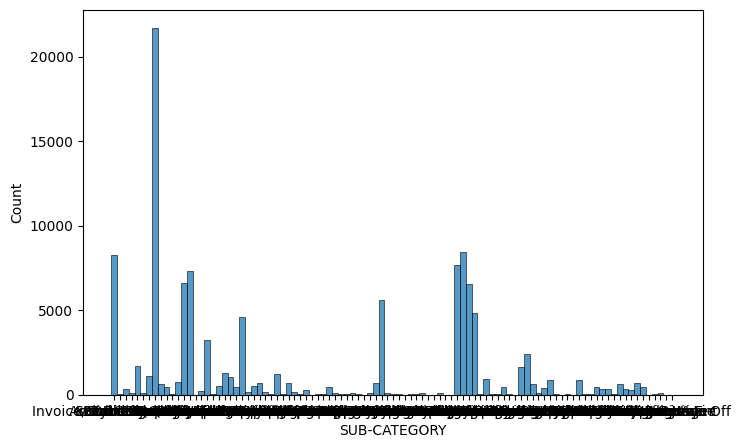

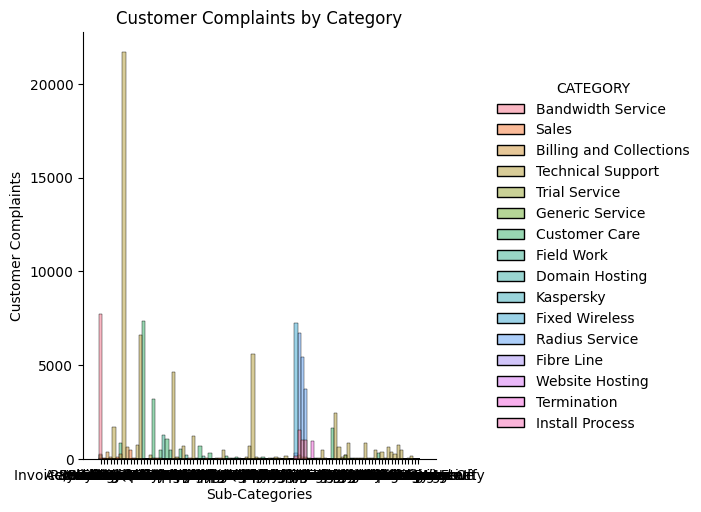

In [195]:
plt.figure(figsize=(8, 5))
sns.histplot(data=new_dataset, x='SUB-CATEGORY')
sns.displot(new_dataset, x="SUB-CATEGORY", hue="CATEGORY")
plt.title('Customer Complaints by Category')
plt.xlabel('Sub-Categories')
plt.ylabel('Customer Complaints')

Investigating the relationship between ticket prioroty and resolution time

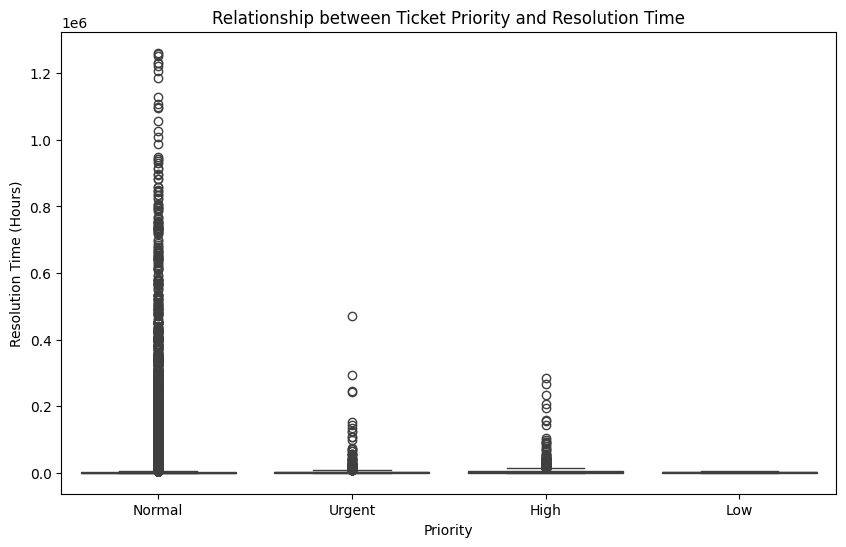

In [196]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_dataset, x='PRIORITY', y='TIME TO CLOSE (MINS)')
plt.title('Relationship between Ticket Priority and Resolution Time')
plt.xlabel('Priority')
plt.ylabel('Resolution Time (Hours)')
plt.show()

A visualization of the number of tickets by ticket source

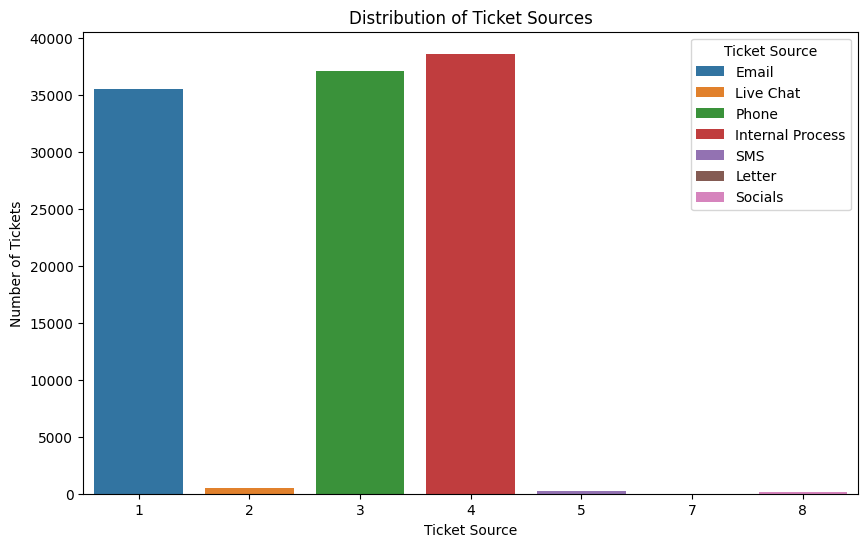

In [197]:
# Invert the source_mapping dictionary
inverted_source_mapping = {v: k for k, v in source_mapping.items()}

# Create a new column with categorical values for 'SOURCE'
new_dataset['SOURCE_CATEGORY'] = new_dataset['SOURCE'].map(inverted_source_mapping)

# Create the countplot with hue set to the new column
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset, x='SOURCE', hue='SOURCE_CATEGORY')
plt.title('Distribution of Ticket Sources')
plt.xlabel('Ticket Source')
plt.ylabel('Number of Tickets')
plt.legend(title='Ticket Source')
plt.show()

Here I am exploring the relationship between ticket source and resolution time of the tickets using a bax plot

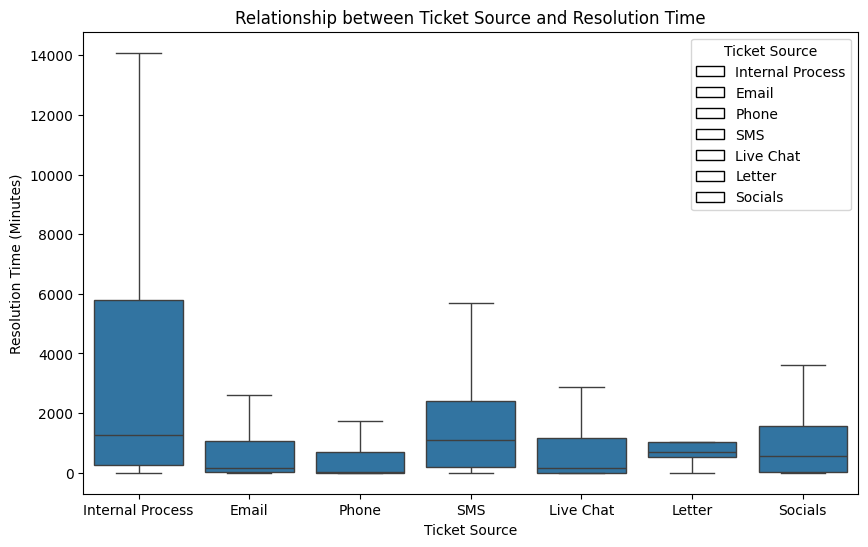

In [198]:
plt.figure(figsize=(10, 6))

# Create the boxplot without a legend
sns.boxplot(data=new_dataset, x='SOURCE_CATEGORY', y='TIME TO CLOSE (MINS)', showfliers=False)

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, fc="white", ec="black")] * len(new_dataset['SOURCE_CATEGORY'].unique())
labels = new_dataset['SOURCE_CATEGORY'].unique()
plt.legend(handles, labels, title='Ticket Source')

plt.title('Relationship between Ticket Source and Resolution Time')
plt.xlabel('Ticket Source')
plt.ylabel('Resolution Time (Minutes)')
plt.show()

In this section, explored the relationship between numner of tickets and ticket centers

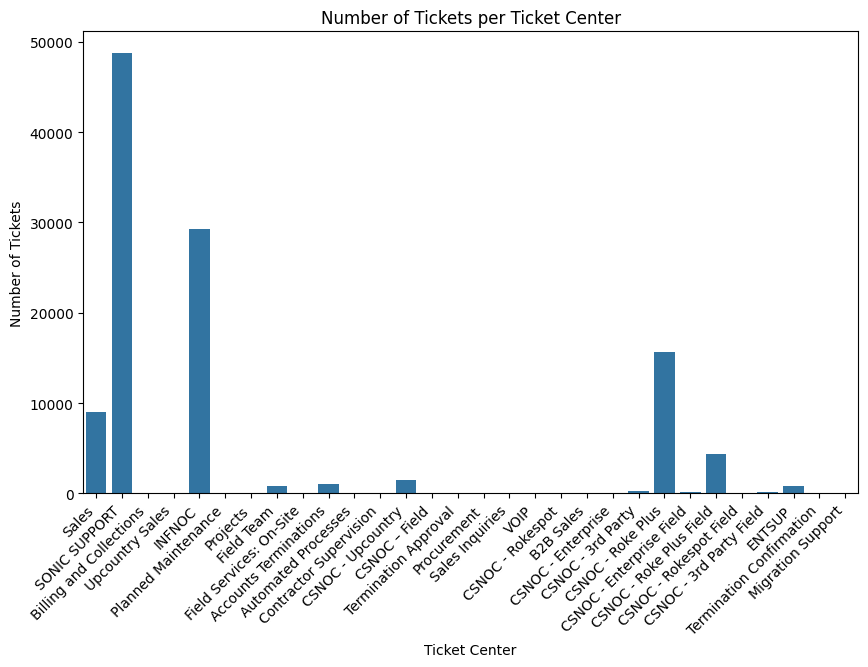

In [199]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset, x='TICKET CENTER')
plt.title('Number of Tickets per Ticket Center')
plt.xlabel('Ticket Center')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')
plt.show()

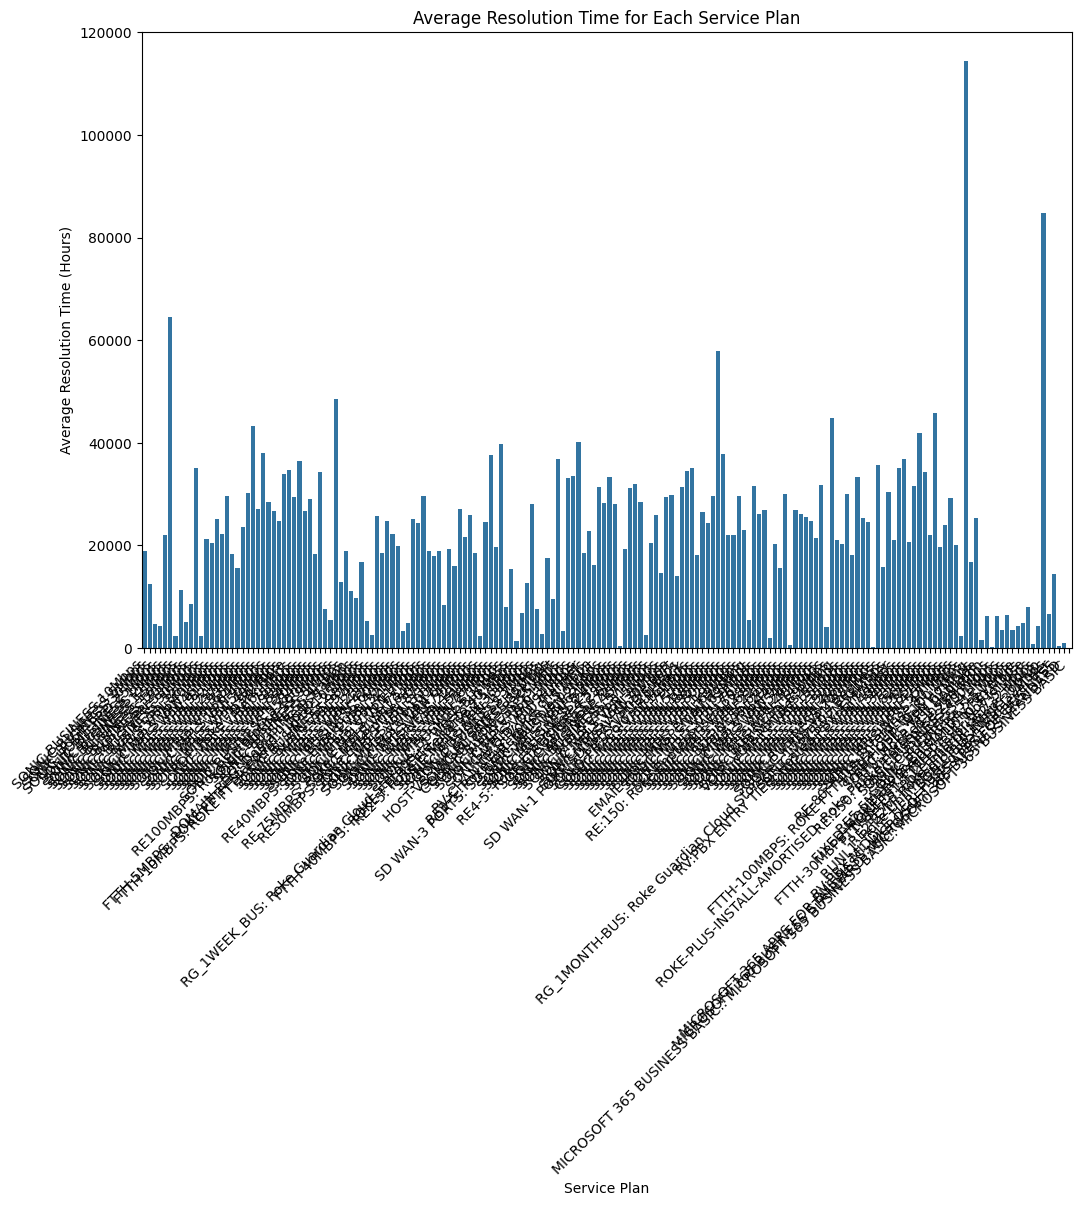

In [176]:
plt.figure(figsize=(12, 8))
sns.barplot(data=new_dataset, x='SERVICE PLAN', y='TIME TO CLOSE (MINS)', errorbar=None)
#sns.displot(new_dataset, x="TIME TO CLOSE (MINS)", hue="SERVICE PLAN")
plt.title('Average Resolution Time for Each Service Plan')
plt.xlabel('Service Plan')
plt.ylabel('Average Resolution Time (Hours)')
plt.xticks(rotation=45, ha='right')
plt.show()